<a href="https://colab.research.google.com/github/Ramaseshanr/anlp/blob/master/BigramLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Mounted at /content/drive/


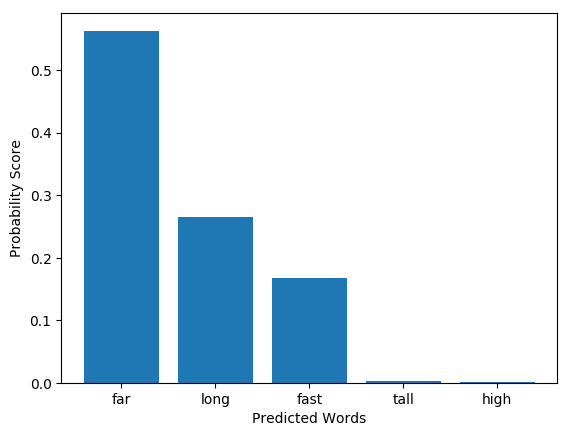

In [7]:
import nltk
from nltk.corpus import gutenberg
nltk.download('gutenberg')
nltk.download('punkt')
from nltk import bigrams


import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

import collections
from collections import Counter, OrderedDict
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)


corpusdir = '/content/drive/My Drive/Corpus'  # Directory of corpus.
newcorpus = PlaintextCorpusReader(corpusdir, '.*')

def bigram_model():
    model = collections.defaultdict(lambda: collections.defaultdict(lambda: 0))
    #for sentence in gutenberg.sents("austen-emma.txt"):

    for sentence in newcorpus.sents():
        sentence = [word.lower() for word in sentence if word.isalpha()]  # get alpha only

        for w1, w2 in bigrams(sentence, pad_right=True, pad_left=True):
            model[(w1)][w2] += 1
        #compute the probability
        for w1 in model:
            total_count = float(sum(model[w1].values()))
            for w2 in model[w1]:
                model[w1][w2] /= total_count

    return model


def predict_next_word(word):
    model = bigram_model()
    next_word = model[word]
    nt = Counter(next_word).most_common(5)


    predicted_word = list(zip(*nt))[0]
    probability_score = list(zip(*nt))[1]
    x_pos = np.arange(len(predicted_word))

    # calculate slope and intercept for the linear trend line
    slope, intercept = np.polyfit(x_pos, probability_score, 1)

    plt.bar(x_pos, probability_score,align='center')
    plt.xticks(x_pos, predicted_word)
    plt.ylabel('Probability Score')
    plt.xlabel('Predicted Words')
    plt.show()

predict_next_word('how')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

# New Section